In [18]:
import subprocess
import csv
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
import numpy as np

In [19]:
# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['green', 'orange', 'purple', 'cyan']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']

securityParams = ['16384','32768', '65536']

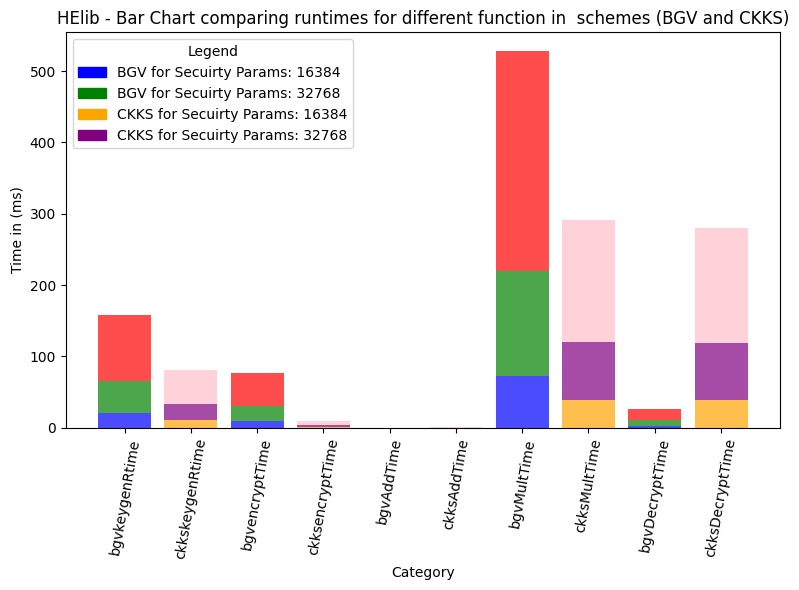

In [20]:
#Ploting All Graphs seperately
def graph_separately_display():
	# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
	bgv_colors = ['blue', 'green', 'red', 'cyan']
	ckks_colors= ['orange', 'purple', 'pink', 'brown']

	data = pd.read_csv("helib_averages.csv")
		
	# Assuming the first column contains the categories
	categories = data.iloc[:, 0]

	# List of columns you want to exclude
	headers_to_filter = ['bgvkeygenRtime' ,'ckkskeygenRtime','bgvencryptTime','ckksencryptTime', 'bgvAddTime','ckksAddTime', 'bgvMultTime','ckksMultTime', 'bgvDecryptTime','ckksDecryptTime']  # Adjust column names as needed

	# Filter out columns to plot
	plt.figure(figsize=(8, 6))
	filtered_data = data[headers_to_filter]
	handles = []
	labels = []
	handles.append(Patch(color=bgv_colors[0]))
	labels.append(f'BGV for Secuirty Params: 16384')
	handles.append(Patch(color=bgv_colors[1]))
	labels.append(f'BGV for Secuirty Params: 32768')
	handles.append(Patch(color=ckks_colors[0]))
	labels.append(f'CKKS for Secuirty Params: 16384')
	handles.append(Patch(color=ckks_colors[1]))
	labels.append(f'CKKS for Secuirty Params: 32768')

	for i, col in enumerate(filtered_data.columns):
		if col.startswith('ckks'):
			colors = ckks_colors
		elif col.startswith('bgv'):
			colors = bgv_colors
		else:
			colors = ['black', 'red'] 

		bottom = None
		for j, row_value in enumerate(filtered_data[col]):
			if bottom is None:
				plt.bar(i, row_value, color=colors[j % len(colors)], label=f'Row {j+1} - {col}', alpha=0.7)
				bottom = row_value
			else:
				plt.bar(i, row_value, color=colors[j % len(colors)], bottom=bottom, label=f'Row {j+1} - {col}', alpha=0.7)
				bottom += row_value
	
	plt.xlabel('Category')
	plt.ylabel('Time in (ms)')
	plt.title(f'HElib - Bar Chart comparing runtimes for different function in  schemes (BGV and CKKS)')
	plt.xticks(rotation=80)
	plt.xticks(range(len(filtered_data.columns)), filtered_data.columns)

	# Adding legend
	# print(labels, handles)
	plt.legend(handles, labels, title='Legend', loc='upper left')

	# Showing the plot
	plt.tight_layout()  # Adjust layout to prevent clipping of labels
	plt.show()

graph_separately_display()
	

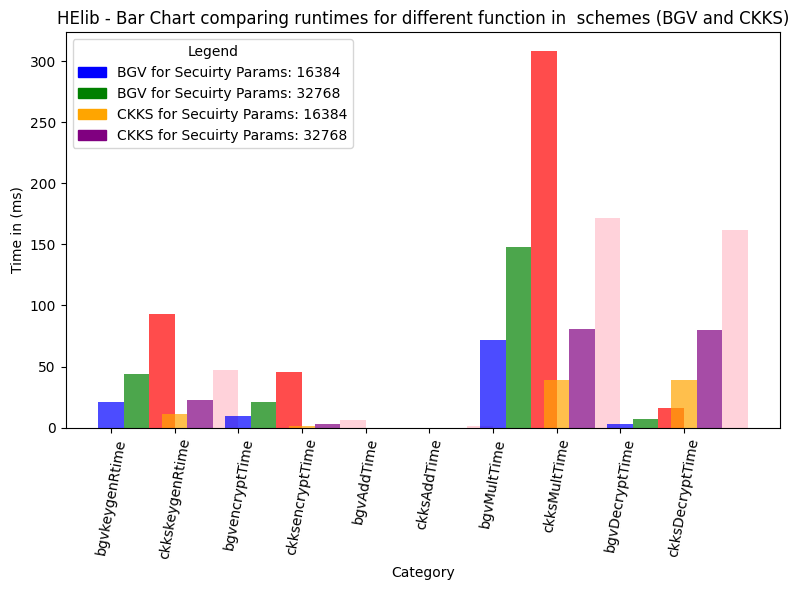

In [21]:
def graph_separately_display():
	bgv_colors = ['blue', 'green', 'red', 'cyan']
	ckks_colors= ['orange', 'purple', 'pink', 'brown']
	data = pd.read_csv("helib_averages.csv")
		
	bar_width = 0.4
	headers_to_filter = ['bgvkeygenRtime' ,'ckkskeygenRtime','bgvencryptTime','ckksencryptTime', 'bgvAddTime','ckksAddTime', 'bgvMultTime','ckksMultTime', 'bgvDecryptTime','ckksDecryptTime']  # Adjust column names as needed

	# Filter out columns to plot
	plt.figure(figsize=(8, 6))
	filtered_data = data[headers_to_filter]
	handles = []
	labels = []
	handles.append(Patch(color=bgv_colors[0]))
	labels.append(f'BGV for Secuirty Params: 16384')
	handles.append(Patch(color=bgv_colors[1]))
	labels.append(f'BGV for Secuirty Params: 32768')
	handles.append(Patch(color=ckks_colors[0]))
	labels.append(f'CKKS for Secuirty Params: 16384')
	handles.append(Patch(color=ckks_colors[1]))
	labels.append(f'CKKS for Secuirty Params: 32768')

	for i, col in enumerate(filtered_data.columns):
		if col.startswith('ckks'):
			colors = ckks_colors
		elif col.startswith('bgv'):
			colors = bgv_colors
		else:
			colors = ['black', 'red'] 

		for j, row_value in enumerate(filtered_data[col]):
			plt.bar(i + j * bar_width, row_value, color=colors[j % len(colors)],  alpha=0.7, width=bar_width)
	
	plt.xlabel('Category')
	plt.ylabel('Time in (ms)')
	plt.title(f'HElib - Bar Chart comparing runtimes for different function in  schemes (BGV and CKKS)')
	plt.xticks(rotation=80)
	plt.xticks(range(len(filtered_data.columns)), filtered_data.columns)

	plt.legend(handles, labels, title='Legend', loc='upper left')

	# Showing the plot
	plt.tight_layout()  # Adjust layout to prevent clipping of labels
	plt.show()
graph_separately_display()

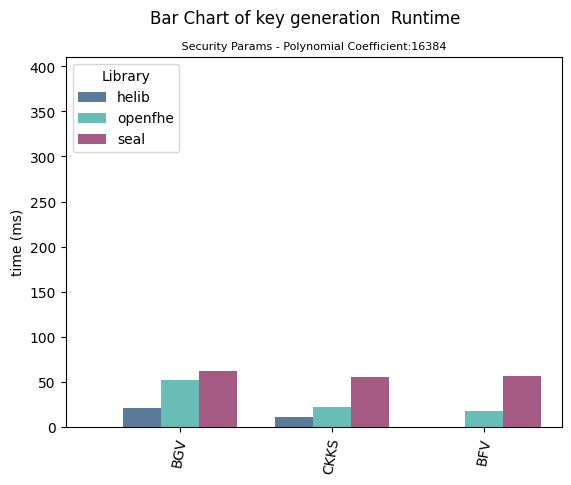

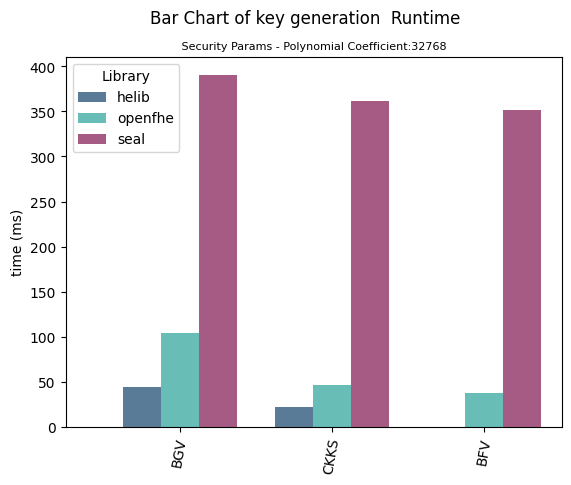

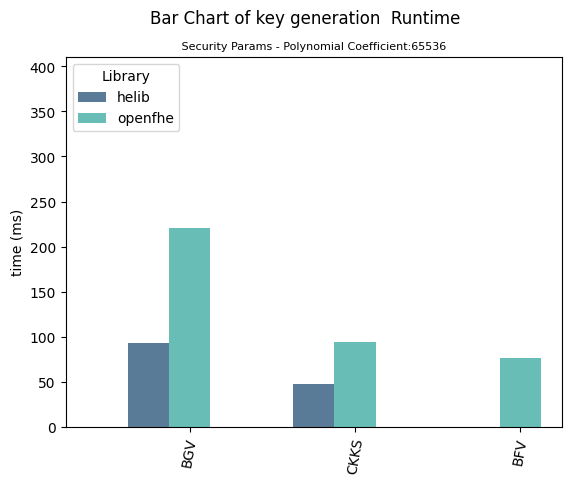

In [22]:
# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']
securityParams = [16384,32768, 65536]

for i, target_value in enumerate(securityParams):
    bgvdata = []
    ckksdata = []
    bfvdata = []
    libraries = []
    Plaintext_modulus = 786433
    poly_coeff = target_value

    # Read data from CSV files into a dictionary of DataFrames
    for file, columns in [('helib_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime']),
                        ('openfhe_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime']),
                        ('seal_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime'])]:
        df = pd.read_csv(file)
        filtered_data = df[df['securityParam'] == target_value]
        filtered_data = filtered_data[columns]
        bgvdata.extend(filtered_data['bgvkeygenRtime'].values)
        ckksdata.extend(filtered_data['ckkskeygenRtime'].values)
        if 'bfvkeygenRtime' in filtered_data.columns:
            bfvdata.extend(filtered_data['bfvkeygenRtime'].values)
        else:
            bfvdata.extend({0})
        libraries.extend([file.split('_')[0]] * len(filtered_data))

    # Set the width of the bars
    bar_width = 1
    index = np.arange(len(bgvdata))

    # Plotting the bars chart with colored bars
    for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
        plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7, label=library)

    for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
        plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    for i, (x, bfv, library) in enumerate(zip(index, bfvdata, libraries)):
        plt.bar(x+10, bfv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    plt.ylabel('time (ms)')
    plt.suptitle('Bar Chart of key generation  Runtime', fontsize=12)
    plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff} ',fontsize=8)
    plt.xticks(index, range(len(bgvdata)))
    plt.xticks(rotation=80)
    plt.ylim(0, 410)
    tick_positions = [3, 7, 11]
    plt.xticks(tick_positions, labels)
    plt.legend(title='Library', loc='upper left')
    plt.show()

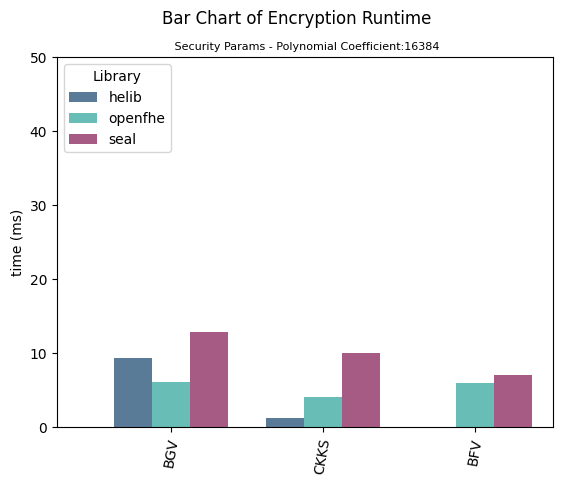

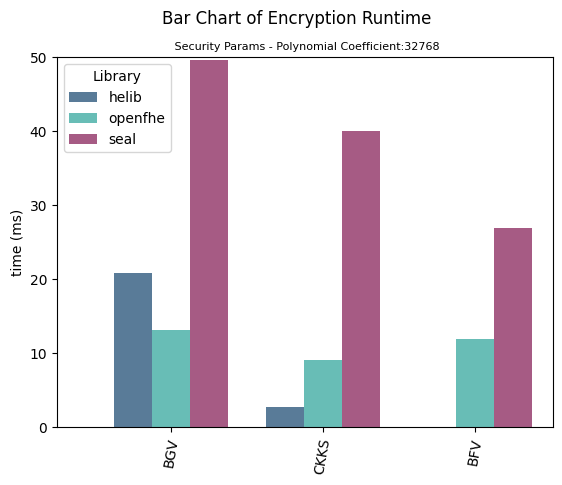

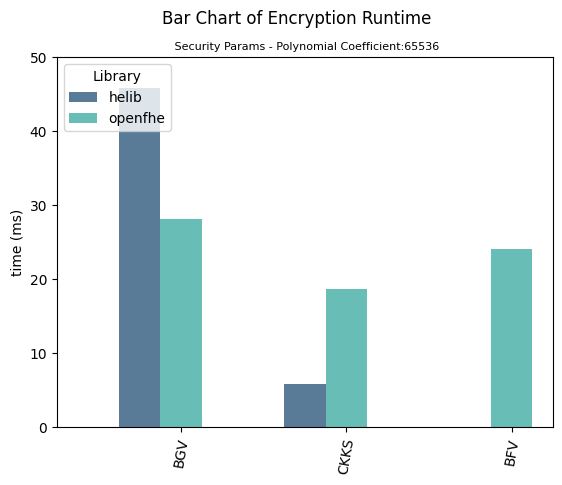

In [23]:
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']

securityParams = [16384,32768,65536]

for i, target_value in enumerate(securityParams):
    bgvdata = []
    ckksdata = []
    bfvdata = []
    libraries = []
    Plaintext_modulus = 786433
    poly_coeff = target_value

    # Read data from CSV files into a dictionary of DataFrames
    for file, columns in [('helib_averages.csv', ['bgvencryptTime', 'ckksencryptTime']),
                        ('openfhe_averages.csv', ['bgvencryptTime', 'ckksencryptTime','bfvencryptTime']),
                        ('seal_averages.csv', ['bgvencryptTime', 'ckksencryptTime','bfvencryptTime'])]:
        df = pd.read_csv(file)
        filtered_data = df[df['securityParam'] == target_value]
        filtered_data = filtered_data[columns]
        bgvdata.extend(filtered_data['bgvencryptTime'].values)
        ckksdata.extend(filtered_data['ckksencryptTime'].values)
        if 'bfvencryptTime' in filtered_data.columns:
            bfvdata.extend(filtered_data['bfvencryptTime'].values)
        else:
            bfvdata.extend({0})
        libraries.extend([file.split('_')[0]] * len(filtered_data))

    # Set the width of the bars
    bar_width = 1
    index = np.arange(len(bgvdata))

    # Plotting the bars chart with colored bars
    for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
        plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7, label=library)

    for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
        plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    for i, (x, bfv, library) in enumerate(zip(index, bfvdata, libraries)):
        plt.bar(x+10, bfv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    plt.ylabel('time (ms)')
    plt.suptitle('Bar Chart of Encryption Runtime', fontsize=12)
    plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff}',fontsize=8)
    plt.xticks(index, range(len(bgvdata)))
    plt.xticks(rotation=80)
    plt.ylim(0, 50)
    tick_positions = [3, 7, 11]
    plt.xticks(tick_positions, labels)
    plt.legend(title='Library', loc='upper left')
    plt.show()

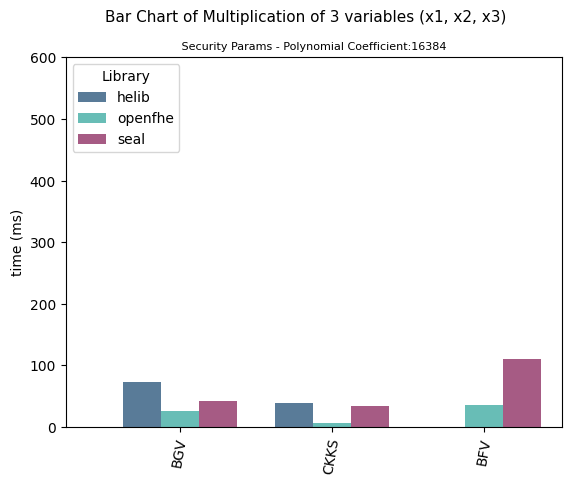

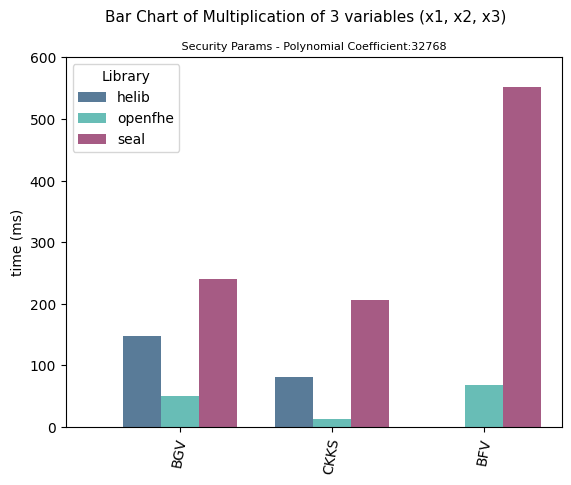

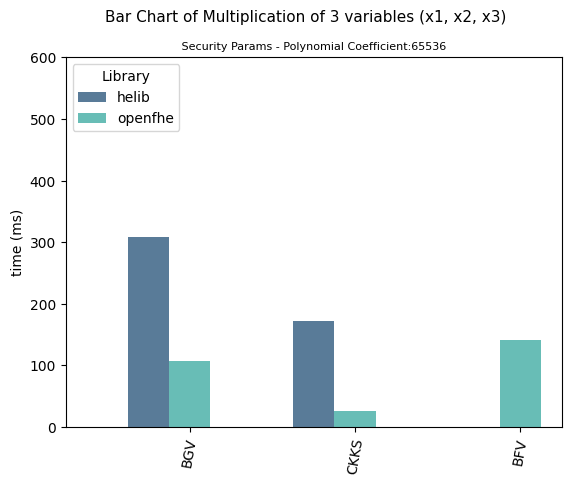

In [24]:
securityParams = [16384, 32768, 65536]

for i, target_value in enumerate(securityParams):
    bgvdata = []
    ckksdata = []
    bfvdata = []
    libraries = []
    Plaintext_modulus = 786433
    poly_coeff = target_value
    # Read data from CSV files into a dictionary of DataFrames
    for file, columns in [('helib_averages.csv', ['bgvMultTime', 'ckksMultTime']),
                        ('openfhe_averages.csv', ['bgvMultTime', 'ckksMultTime','bfvMultTime']),
                        ('seal_averages.csv', ['bgvMultTime', 'ckksMultTime','bfvMultTime'])]:
        df = pd.read_csv(file)
        filtered_data = df[df['securityParam'] == target_value]
        filtered_data = filtered_data[columns]
        bgvdata.extend(filtered_data['bgvMultTime'].values)
        ckksdata.extend(filtered_data['ckksMultTime'].values)
        if 'bfvMultTime' in filtered_data.columns:
            bfvdata.extend(filtered_data['bfvMultTime'].values)
        else:
            bfvdata.extend({0})
        libraries.extend([file.split('_')[0]] * len(filtered_data))

    bar_width = 1
    index = np.arange(len(bgvdata))

    # Plotting the bars chart with colored bars
    for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
        plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7, label=library)

    for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
        plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    for i, (x, ckks, library) in enumerate(zip(index, bfvdata, libraries)):
        plt.bar(x+10, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    plt.ylabel('time (ms)')
    plt.suptitle('Bar Chart of Multiplication of 3 variables (x1, x2, x3)', fontsize=11)
    plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff} ',fontsize=8)
    plt.xticks(index, range(len(bgvdata)))
    plt.xticks(rotation=80)
    plt.ylim(0, 600)
    tick_positions = [3, 7, 11]
    plt.xticks(tick_positions, labels)
    plt.legend(title='Library', loc='upper left')
    plt.show()

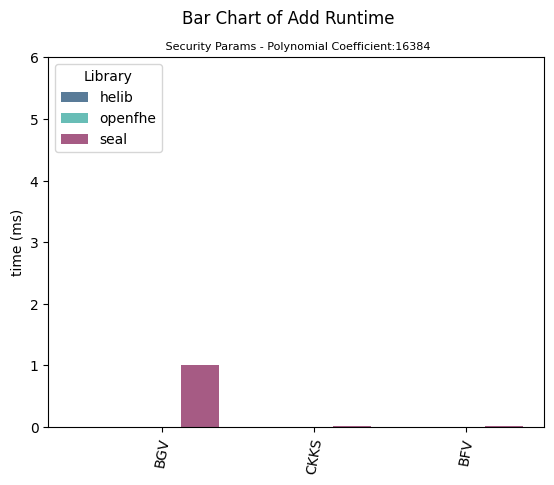

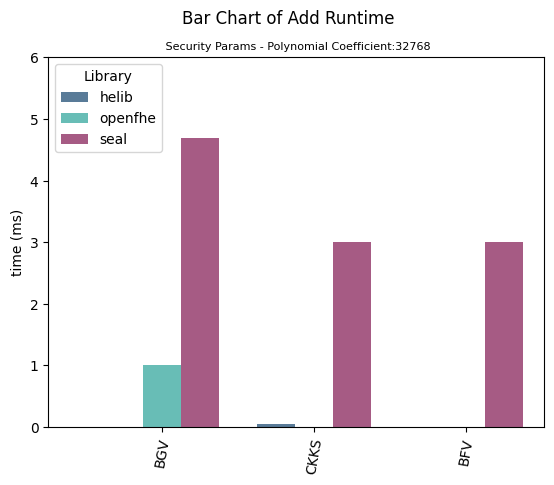

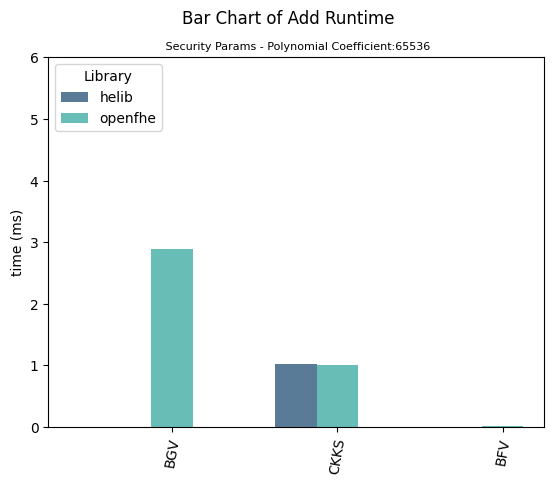

In [25]:
# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']
securityParams = [16384, 32768, 65536]

for i, target_value in enumerate(securityParams):
    Plaintext_modulus = 786433
    target_value = target_value
    poly_coeff = target_value

    # Read data from CSV files into a dictionary of DataFrames
    for file, columns in [('helib_averages.csv', ['bgvAddTime', 'ckksAddTime']),
                        ('openfhe_averages.csv', ['bgvAddTime', 'ckksAddTime','bfvAddTime']),
                        ('seal_averages.csv', ['bgvAddTime', 'ckksAddTime','bfvAddTime'])]:
        df = pd.read_csv(file)
        filtered_data = df[df['securityParam'] == target_value]
        filtered_data = filtered_data[columns]
        bgvdata.extend(filtered_data['bgvAddTime'].values)
        ckksdata.extend(filtered_data['ckksAddTime'].values)
        if 'bfvAddTime' in filtered_data.columns:
            bfvdata.extend(filtered_data['bfvAddTime'].values)
        else:
            bfvdata.extend({0})
        libraries.extend([file.split('_')[0]] * len(filtered_data))

    # Set the width of the bars
    bar_width = 1
    index = np.arange(len(bgvdata))

    # Plotting the bars chart with colored bars
    for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
        plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7, label=library)

    for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
        plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    for i, (x, ckks, library) in enumerate(zip(index, bfvdata, libraries)):
        plt.bar(x+10, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    plt.ylabel('time (ms)')
    plt.suptitle('Bar Chart of Add Runtime', fontsize=12)
    plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff}',fontsize=8)
    plt.xticks(index, range(len(bgvdata)))
    plt.ylim(0, 6)
    plt.xticks(rotation=80)
    tick_positions = [3, 7, 11]
    plt.xticks(tick_positions, labels)
    plt.legend(title='Library', loc='upper left')
    plt.show()
    bgvdata = []
    ckksdata = []
    bfvdata = []
    libraries = []

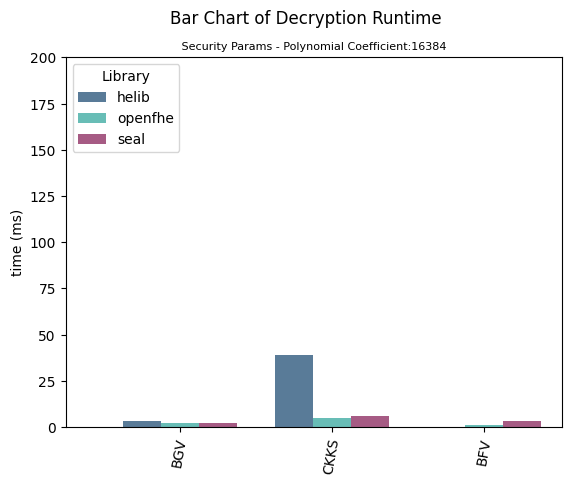

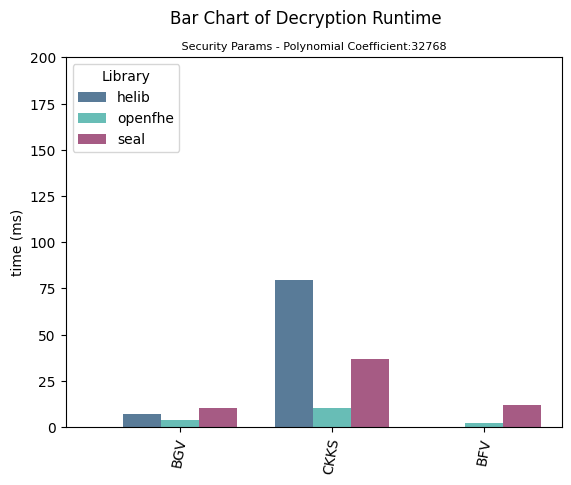

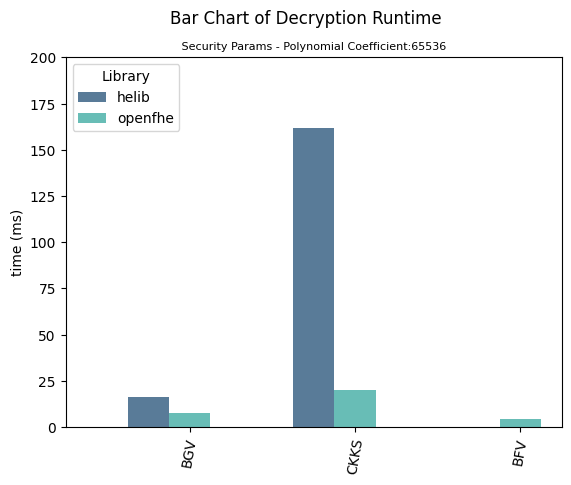

In [26]:
# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['#12436D', '#28A197', '#801650', '#F46A25']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']
securityParams = [16384,32768, 65536]

securityParams = [16384, 32768, 65536]

for i, target_value in enumerate(securityParams):

    # Read data from CSV files into a dictionary of DataFrames
    for file, columns in [('helib_averages.csv', ['bgvDecryptTime', 'ckksDecryptTime']),
                        ('openfhe_averages.csv', ['bgvDecryptTime', 'ckksDecryptTime','bfvDecryptTime']),
                        ('seal_averages.csv', ['bgvDecryptTime', 'ckksDecryptTime','bfvDecryptTime'])]:
        df = pd.read_csv(file)
        filtered_data = df[df['securityParam'] == target_value]
        filtered_data = filtered_data[columns]
        bgvdata.extend(filtered_data['bgvDecryptTime'].values)
        ckksdata.extend(filtered_data['ckksDecryptTime'].values)
        if 'bfvDecryptTime' in filtered_data.columns:
            bfvdata.extend(filtered_data['bfvDecryptTime'].values)
        else:
            bfvdata.extend({0})
        libraries.extend([file.split('_')[0]] * len(filtered_data))

    # Set the width of the bars
    bar_width = 1
    index = np.arange(len(bgvdata))

    # Plotting the bars chart with colored bars
    for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
        plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7, label=library)

    for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
        plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    for i, (x, bfv, library) in enumerate(zip(index, bfvdata, libraries)):
        plt.bar(x+10, bfv, width=bar_width, color=colors[i % len(colors)],  alpha=0.7)

    plt.ylabel('time (ms)')
    plt.suptitle('Bar Chart of Decryption Runtime', fontsize=12)
    plt.title(f' Security Params - Polynomial Coefficient:{target_value} ',fontsize=8)
    plt.xticks(index, range(len(bgvdata)))
    plt.ylim(0, 200)
    plt.xticks(rotation=80)
    tick_positions = [3, 7, 11]
    plt.xticks(tick_positions, labels)
    plt.legend(title='Library', loc='upper left')
    plt.show()
    bgvdata = []
    ckksdata = []
    bfvdata = []
    libraries = []



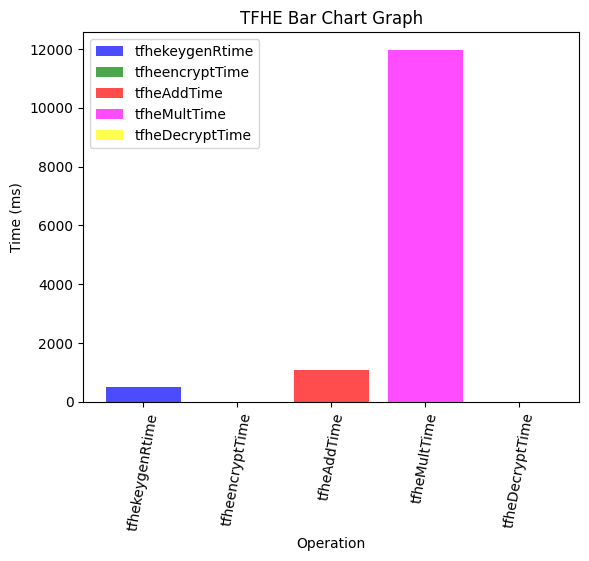

In [28]:
data = pd.read_csv("tfhe_averages.csv")

# List of columns you want to exclude
headers_to_filter = ['tfhekeygenRtime', 'tfheencryptTime', 'tfheAddTime', 'tfheMultTime', 'tfheDecryptTime']
colors = ['blue', 'green', 'red',  'magenta', 'yellow', 'black']

# Filter out the columns to be excluded
filtered_data = data[headers_to_filter]

# Get the number of rows and columns in the filtered data
num_rows, num_cols = filtered_data.shape

# Plot a separate bar graph for each row
for i in range(num_rows):
    row_data = filtered_data.iloc[i]
    color = colors[i % len(colors)]  # Ensure unique color for each row
    plt.bar(range(len(row_data)), row_data, color=colors, alpha=0.7, label=headers_to_filter)
    plt.xlabel('Operation')
    plt.ylabel('Time (ms)')
    plt.title(f'TFHE Bar Chart Graph')
    plt.xticks(rotation=80)
    plt.xticks(range(len(filtered_data.columns)), filtered_data.columns)
    plt.legend(headers_to_filter)
    plt.show()